**кластеризатор MeanShift (ФорЭл)**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_blobs

In [2]:
# from sklearn.datasets import make_moons

# n_samples = 500
# X, _ = make_moons(n_samples=n_samples, noise=.09)
# X.shape

In [3]:
n_samples = 500
n_clst = 12 # количество кластеров

X,_ = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        cluster_std=rng.uniform(size=n_clst)+.7
    )
X.shape

(500, 2)

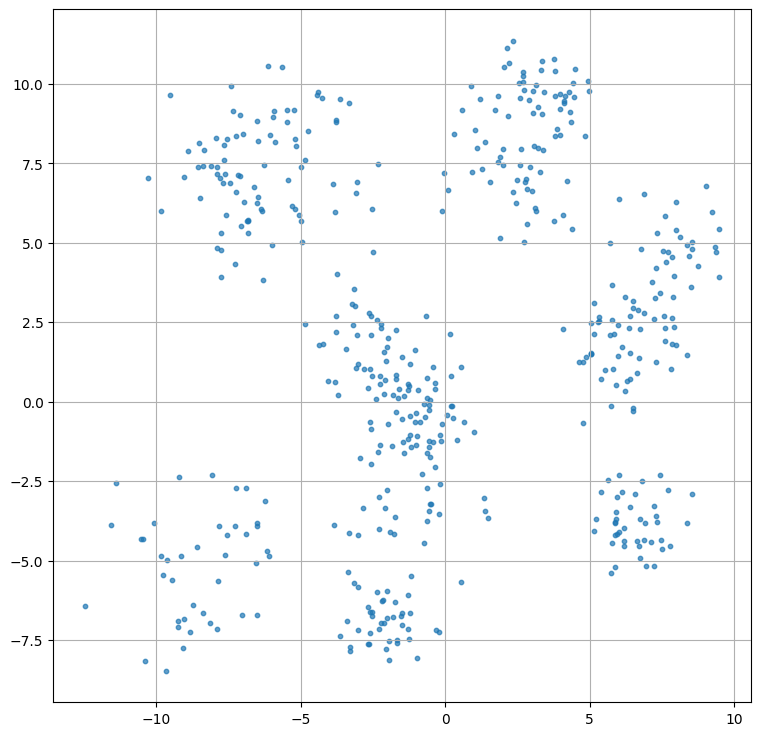

In [4]:
plt.figure(figsize=(9,9))
plt.scatter( x=X[:,0], y=X[:,1], s=10, alpha=0.7 )
plt.grid()

---

In [5]:
def build_cluster(X,r,delta): # формируем кластер из X радиуса r 
    xc = X[rng.choice(len(X))] # выбираем одну точку X случайно
    for _ in range(1000): 
        xc_prev = xc 
         # меряем расстояния от xc до всех точек X
        mask = euclidean_distances([xc],X).flatten()<r # ... и маркируем близкие (расстояние меньше r)
        xc = X[mask].mean(axis=0) # пересчитываем центроид (среднее отмеченных т.е. близких точек)
        if euclidean_distances([xc],[xc_prev]).flatten()[0] < delta: 
            break # если центроид не сместился то завершаем процедуру
    return xc,mask # результат - центр кластера и отмеченные точки близкие к нему

In [6]:
def mean_shift(X,r,delta):
    result = [] # список кластеров
    xc,mask = build_cluster(X,r=r,delta=delta) # строим кластер
    result.append([xc,X[mask]])
    if not mask.all(): # если есть ещё не отмеченные точки, то повторяем для них процедуру
        result.extend( mean_shift(X[~mask],r=r,delta=delta) )
    return result

In [7]:
np.median(euclidean_distances(X)) # медианное расстояние между точками

9.456420050591387

In [8]:
r = 2.7 # максимально допустимое удаление от центройда 
delta = 1e-16 # допустимое смещение центройда при поиске центра кластера

clusters = mean_shift(X,r=r,delta=delta)

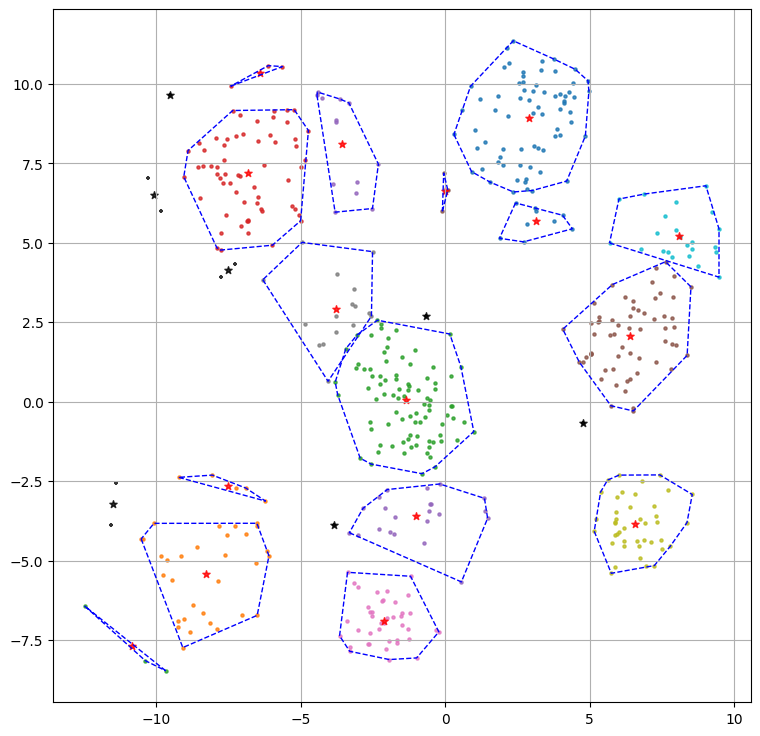

In [9]:
from scipy.spatial import ConvexHull

plt.figure(figsize=(9,9))
for xc,X_ in clusters:
    if len(X_)<3: # кластеры с очень маленьким числом элементов
        plt.scatter( x=X_[:,0],y=X_[:,1], s=5, alpha=0.8,c='black',marker='+' )    
        plt.scatter( x=xc[0],y=xc[1], s=30, alpha=0.8,c='black',marker='*' )
    else:
        plt.scatter( x=X_[:,0],y=X_[:,1], s=5, alpha=0.8 )    
        plt.scatter( x=xc[0],y=xc[1], s=30, alpha=0.8,marker='*',c='r' )
        hull = ConvexHull( X_ ) # рисуем выпуклую оболочку вокруг кластера
        v = np.append( hull.vertices, hull.vertices[0] ) # замыкаем оболочку
        plt.plot(  X_[v,0],X_[v,1], '--', lw=1,c='b')
    
plt.grid()    